# Machine Learning for Tumor Classification: Predicting whether Breast Tumors are Malignant or Benign in Cancer Diagnoses

## Introduction

Breast cancer is a prevalent and potentially life-threatening disease that originates in the cells of the breast. It is the most common cancer among women worldwide, with early detection playing a pivotal role in successful treatment outcomes. Early detection allows for more effective and less invasive treatment options, significantly improving the chances of survival and reducing the need for extensive interventions.

The Wisconsin Breast Cancer dataset serves as a valuable resource in the field of medical research and data science. Collected from fine needle aspirates, this dataset provides essential information about various features of breast cancer cells. This dataset can be leveraged to develop predictive models that can assist in identifying patterns and predicting the likelihood of malignancy. Building accurate prediction models based on such datasets contributes to the advancement of early detection methods, thereby enhancing the efficiency of breast cancer diagnosis and treatment planning.

The goal of this project is to build a predictive model for breast cancer diagnosis based on the Wisconsin Breast Cancer Dataset. Specifically, It aims to classify tumors as malignant (M) or benign (B) using various features computed from digitized images of fine needle aspirates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingClassifier, BaggingClassifier

import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Setting up the data and Exploratory Data Analysis

#### In this section, I will explore the data using data visualization techniques. While exploring, I will perform any data preprocessing steps needed along the way such as removing null values or encoding variables.

### About the dataset

In [2]:
df = pd.read_csv('dataset.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The Wisconsin Breast Cancer dataset is a collection of features derived from fine needle aspirates of breast cancer cells. It includes measurements such as the mean radius, texture, perimeter, area, smoothness, and other characteristics that describe cell nuclei. Each sample in the dataset is labeled as either benign or malignant, providing a binary classification for model training. With 569 instances and 30 features, this dataset is widely used in machine learning and data analysis to build predictive models for breast cancer diagnosis and prognosis.

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Check for missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Display summary statistics
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

### Attribute Information

In [6]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


1) ID number  
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)   
c) perimeter    
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  
  
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
  
All feature values are recoded with four significant digits.
  
Missing attribute values: none
  
Class distribution: 357 benign, 212 malignant

### Distribution of Benign (B) and Malignant (M) Diagnoses

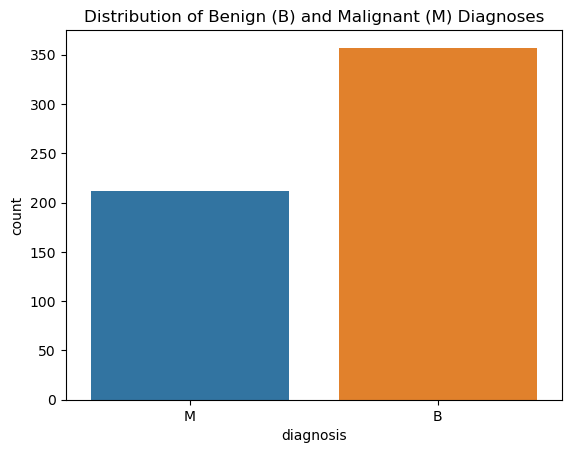

In [7]:
sns.countplot(data = df, x = 'diagnosis')
plt.title('Distribution of Benign (B) and Malignant (M) Diagnoses');

The dataset exhibits an imbalance with 357 instances of benign diagnoses and 212 instances of malignant diagnoses. This prevalence suggests a higher representation of benign cases. In our project, addressing this class imbalance is crucial for developing accurate predictive models. We will employ techniques such as oversampling later in the project or careful selection of evaluation metrics to ensure robust performance.

##### Class imbalance addressed later in data preprocessing

### Encoding categorical variables and dropping missing values (if any)

In [8]:
# Drop rows with missing values or impute them (if any)
df = df.dropna() 

# Encode categorical variables 
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The data set does not have any missing values and the categorical variables are encoded.

Further, it would be helpful to make the id the index as id does not contribute to the models itself

In [10]:
df = df.set_index('id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Visualizing correlations between variables

In [11]:
df_corr = df.corr();
df_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

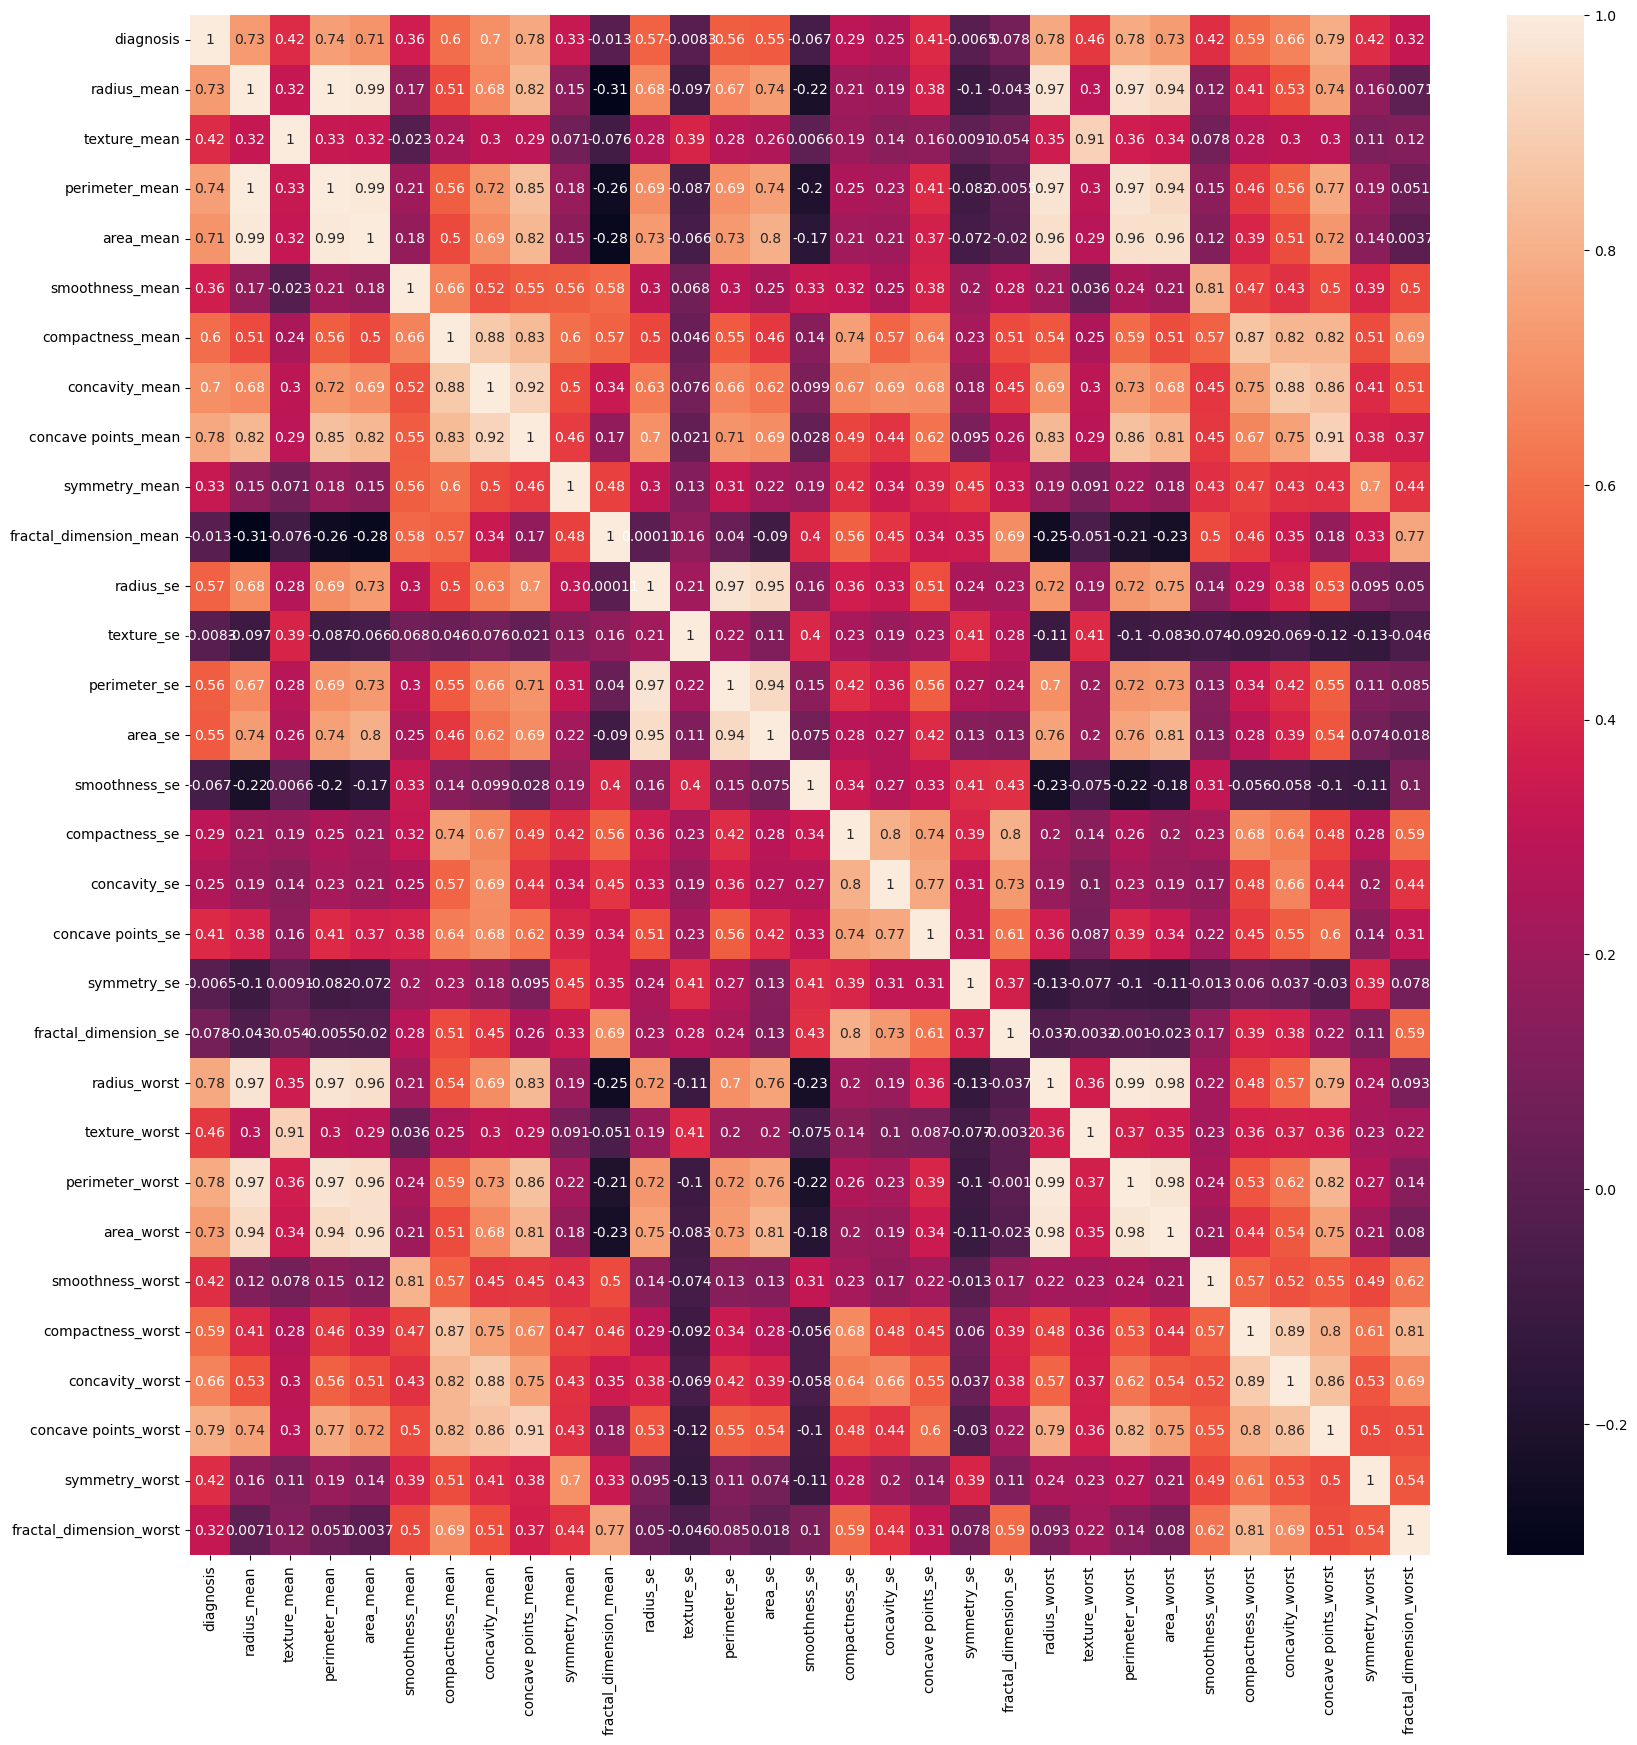

In [12]:
# visualize the correlations using a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

#### Observations: Strong correlation between independent variables and multicollinearity

High correlation between variables suggests that they provide very similar information about the target variable. In such cases, keeping both features might not add much value to the model and could lead to multicollinearity issues. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to determine the individual effect of each variable on the dependent variable. It can lead to unstable coefficient estimates and reduced interpretability. 

1. *perimeter_mean, radius_mean, area_mean, radius_worst, perimeter_worst, and area_worst* are **highly** correlated - all have similar correlations to diagnosis so let's only keep **radius_mean**. 
2. *radius_se, perimeter_se, and area_se* are **highly correlated** so let's only keep **radius_se** in the dataset since it has strongest correlation to diagnosis amongst the three. 

In [13]:
# remove aforementioned variables
df_old = df
df = df.drop(["perimeter_mean", "area_mean", "radius_worst", "area_worst", "perimeter_worst", "perimeter_se", "area_se" ], axis=1) 

In [14]:
print(df.columns.size)
print(df_old.columns.size)

24
31


## Observing Relationships in the Data Against "Diagnosis" which is what I will predict

In [15]:
df.groupby(['diagnosis']).mean()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,...,0.009858,0.020584,0.003636,23.515070,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,...,0.015060,0.020472,0.004062,29.318208,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


The above table shows information on the ranges of values of independent variables that are associated with malignant or benign tumors. For example, higher radius_mean is correlated to malignant (M/1) tumors which may suggest that bigger tumors are more likely to be malignant. Similarly, higher texture_mean is also correlated to malignant (M/1) tumors. These relationships can also be *visualized* separately using boxplots as done below.  

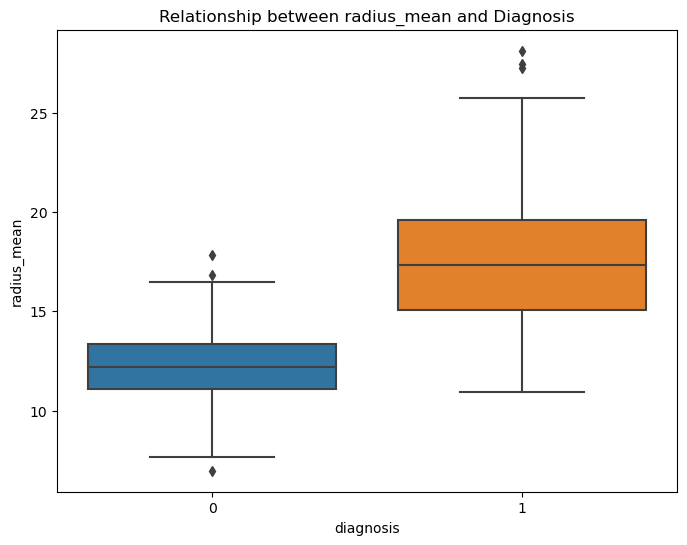

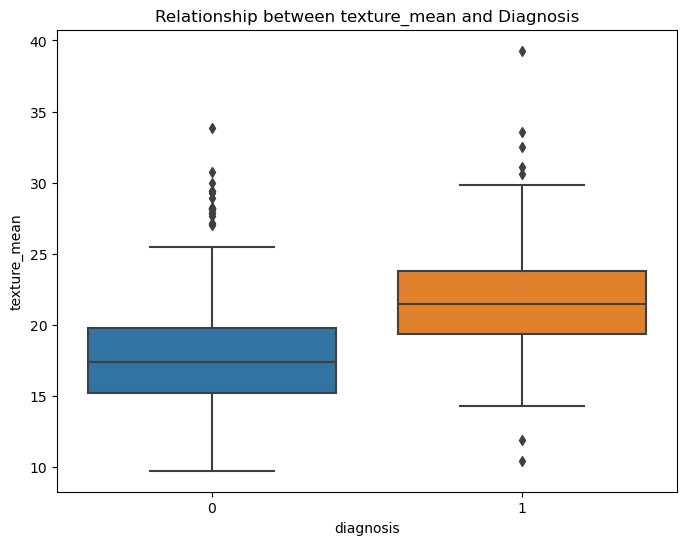

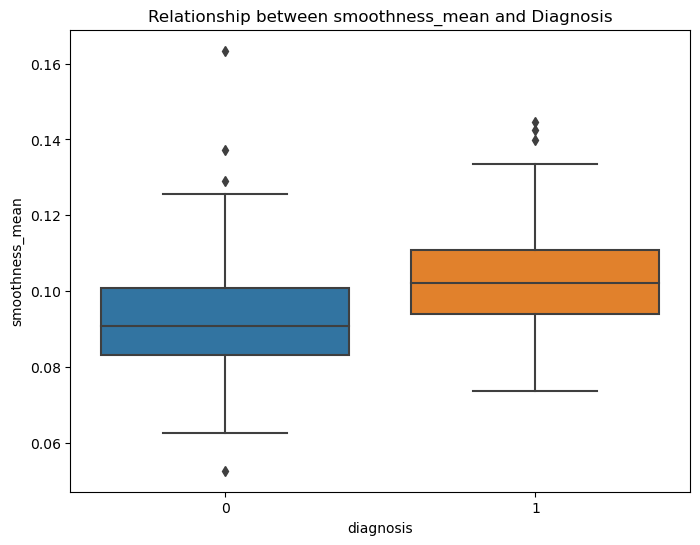

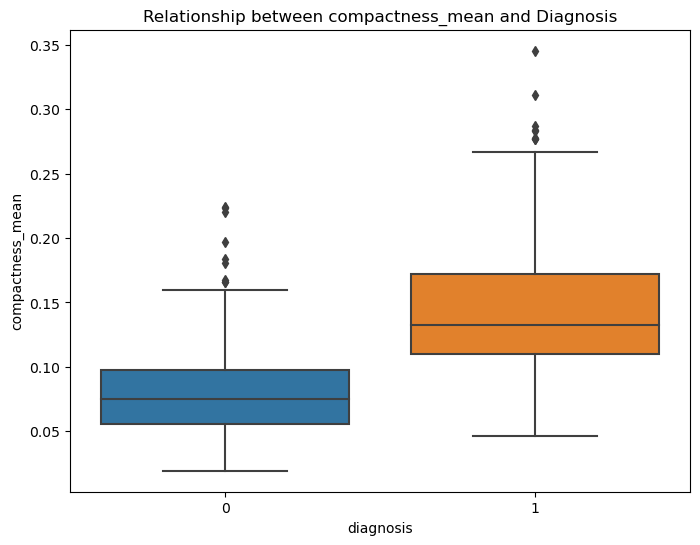

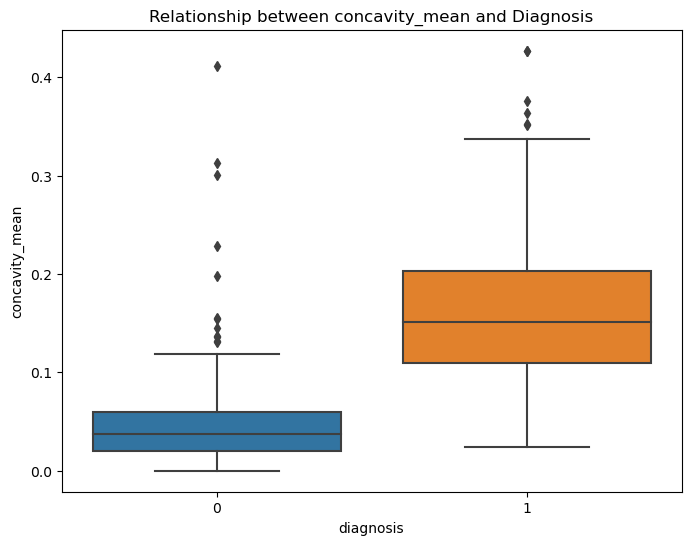

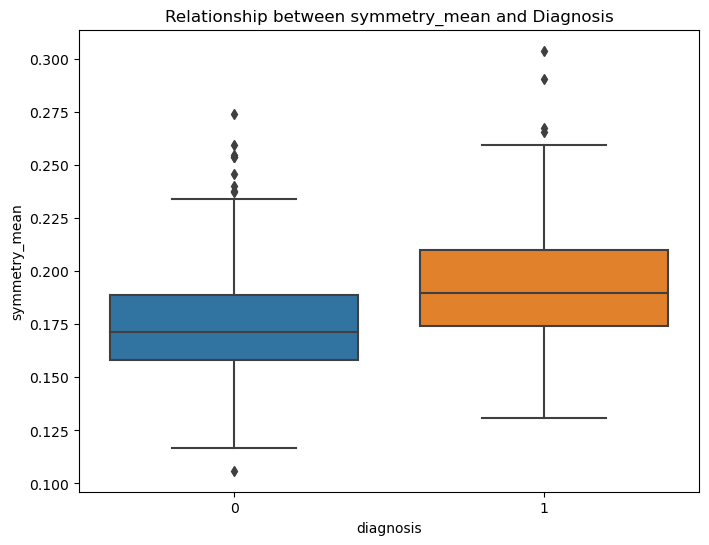

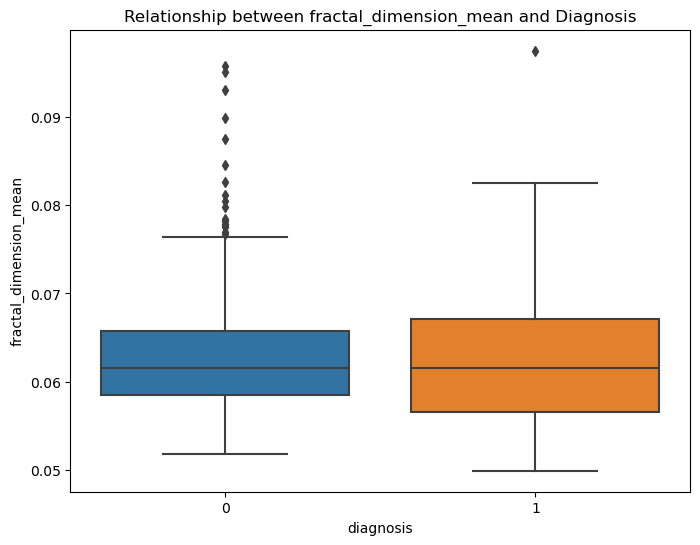

In [16]:
# Visualize the relationship between selected features and diagnosis
selected_features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Relationship between {feature} and Diagnosis')
    plt.show()

#### Some observations from the boxplots above:

1. Median radius_mean for the benign group is higher than that of the malignant group indicating that, on average, malignant cases have a larger radius mean.
2. Similalry, on average, malignant cases have a larger texture_mean, smoothness_mean, compactness_mean, concavity_mean, and symmetry_mean. This difference in medians is most significant inc concavity_mean where there is no overlap indicating that malignant tumors have a much larger concavity_mean on average. 
3. Concavity_mean has much higher variability as well in the case of malignant tumors. 

Based on these observations and more, we can further visualize the individual relationships between diagnosis and other variables.

### Relationship between radius_mean, texture_mean, and diagnosis.

<Figure size 3000x1000 with 0 Axes>

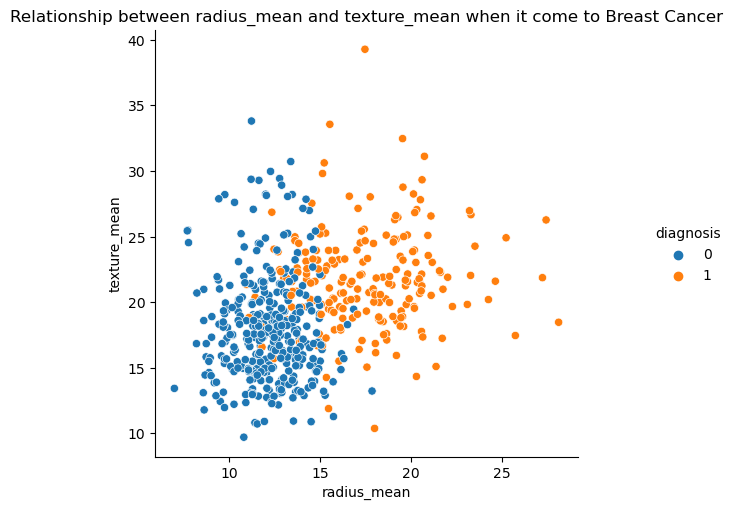

In [17]:
plt.figure(figsize = (30,10))
sns.relplot(data= df, x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis')
plt.title('Relationship between radius_mean and texture_mean when it come to Breast Cancer')
plt.ylabel('texture_mean')
plt.xlabel('radius_mean');

**Observation:** From this plot, we can actually see that as radius_mean increases, tumors are more likely to be malignant. However, such a relationship cannot be found between texture and tumor type.

### Handling Imbalanced Classes using Oversampling Techniques

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


## Creating Models

### Additional Data Preprocessing needed for our models

In [19]:
X = df.drop("diagnosis", axis = 1).values
y = df["diagnosis"].values

#### Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# #'id' and 'diagnosis' columns should not be scaled

Now, the values are on a similar scale with mean 0 and standard deviation 1. This makes it easier to compare and analyze the features, especially when using them as input for machine learning models.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 23)
(381,)
(188, 23)
(188,)


In [22]:
X_train.shape

(381, 23)

#### Choice of Evaluation Metrics

The selection of evaluation metrics is contingent on the nature of the problem and the analysis goals. In the context of cancer diagnosis, where class imbalance is common, the following metrics are often used:

- Accuracy: Measures overall correctness but can be misleading in imbalanced datasets.

- Confusion Matrix: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.

- Precision: Indicates the accuracy of positive predictions, vital in cancer diagnosis to assess the proportion of correctly identified malignant tumors among predicted positives.

- Recall (Sensitivity): Measures the model's ability to capture all relevant instances of the positive class, crucial in detecting malignant tumors.

- F1-Score: The harmonic mean of precision and recall, offering a balanced metric especially useful in imbalanced datasets.

These metrics collectively offer a comprehensive understanding of the model's performance, aligning with project objectives and considering the consequences of false positives and false negatives in the specific application.

### Model 1- Linear Regression 

In [25]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and train the Linear Regression model using scikit-learn
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

In [26]:
lr.intercept_ , lr.coef_

(0.38234086770505726,
 array([ 0.05021642, -0.02963893,  0.02626149, -0.1555176 , -0.1219386 ,
         0.35894463, -0.02669966, -0.04179038,  0.05662595, -0.04066507,
         0.05797265, -0.07604888, -0.12385558,  0.1375585 , -0.0170594 ,
         0.04653385,  0.12954859, -0.03265225,  0.09159865,  0.27080755,
        -0.14739198,  0.09868605,  0.01648823]))

The coefficients help us understand the importance of each of these variables and the impact they have on the prediction.

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"The Mean Squared Error of the model is: {mse}")

# Optional: Use statsmodels for detailed summary
X_train = sm.add_constant(X_train)  # Add a constant term to the features
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

The Mean Squared Error of the model is: 0.07739501087160222
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     50.33
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.87e-97
Time:                        21:23:25   Log-Likelihood:                 9.9774
No. Observations:                 381   AIC:                             28.05
Df Residuals:                     357   BIC:                             122.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

#### Interpretation

The Mean Squared Error (MSE) of the simple linear regression model is a measure of the average squared difference between the predicted and actual values. In this case, the MSE is 0.0774, indicating a relatively low level of error in the model. Moving on to the OLS regression summary, the R-squared value of 0.764 suggests that approximately 76.4% of the variability in the response variable is explained by the model. The Adjusted R-squared, accounting for the number of predictors, is 0.749. The F-statistic of 50.33 is associated with a very low p-value (2.87e-97), indicating that the overall model is statistically significant. However, the analysis of residuals reveals potential issues. The Omnibus test, testing the normality of residuals, has a p-value of 0.005, suggesting non-normality. The Jarque-Bera test also indicates potential departure from normality (p = 0.00343). Additionally, the large condition number (4.46e+04) may indicate multicollinearity. Further investigation and refinement of the model, considering the outlined diagnostic steps, are recommended to enhance its reliability and generalizability.

While the model is good, we may be able to use more complex models we have learned this semester to create better models using our data. Therefore, next, we will look at more complex models.

In [28]:
X_train.shape

(381, 24)

### Model 2- Mulitple Linear Regression with All Variables (including the ones that are highly correlated)

I have created the model below using the same modeling techniques; however, this time, I will be dropping the age, gender, and obesity column as our analysis of the data showed that this may give rise to a better model.

In [29]:
X1 = df_old.drop('diagnosis', axis = 1)
y1 = df_old['diagnosis']
y1.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [30]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

# Fit the multiple linear regression model
mlr = LinearRegression()
mlr.fit(X1_train, y1_train)

# Make predictions on the training set
y1_train_pred = mlr.predict(X1_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y1_train, y1_train_pred)
print(f"The Mean Squared Error on the training set is: {mse_train}")

# Make predictions on the testing set
y1_test_pred = mlr.predict(X1_test)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y1_test, y1_test_pred)
print(f"The Mean Squared Error on the testing set is: {mse_test}")

# Display the summary statistics
X1_train = sm.add_constant(X1_train)  # add a constant term to the predictor
model = sm.OLS(y1_train, X1_train).fit()
print(model.summary())

The Mean Squared Error on the training set is: 0.049593062183566766
The Mean Squared Error on the testing set is: 0.07084542083000904
                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     43.79
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          6.49e-100
Time:                        21:23:25   Log-Likelihood:                 31.628
No. Observations:                 381   AIC:                            -1.256
Df Residuals:                     350   BIC:                             121.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.

#### Interpretation

The model that uses all the variables seems to be slightly better as it has a slightly lower Mean Squared Error. The F-statistic for the multiple linear regression (43.79) is lower than that of the simple linear regression (50.33). However, both F-statistics are indicative of a statistically significant model

### Model 3 - Using Knn

Training Accuracy: 0.97
Testing Accuracy: 0.95

Confusion Matrix:
[[116   5]
 [  5  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       121
           1       0.93      0.93      0.93        67

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



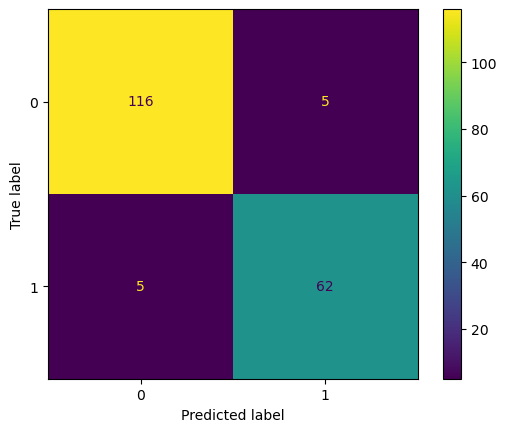

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into features (X) and target variable (y)
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = knn.predict(X_train)

# Make predictions on the testing set
y_test_pred = knn.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_).plot()


Training Accuracy (0.93): This indicates that the KNN model performs well on the training data, correctly predicting the diagnosis in about 93% of the cases. However, high training accuracy doesn't necessarily mean the model will generalize well to new, unseen data.

Testing Accuracy (0.87): This is the accuracy of the model on the testing dataset, which represents new and unseen data. An accuracy of 87% suggests that the model performs well on this dataset too. It correctly predicts the diagnosis in approximately 87% of the cases.

There's a moderate difference of 6% between the two. While a small difference is expected, a larger gap could indicate potential overfitting. A 6% difference is not extremely large, so it suggests that the model is performing reasonably well on both the training and testing data.

### Model 4 - Decision Tree Classifier

Training Accuracy: 1.00
Testing Accuracy: 0.94

Confusion Matrix:
[[84  5]
 [ 3 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.91      0.94      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



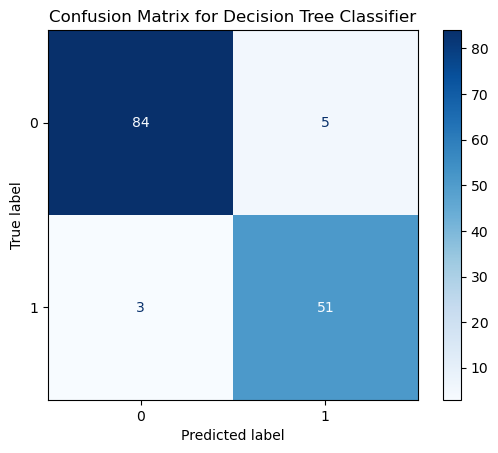

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Splitting the data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fitting the model
dt_classifier.fit(X_train, y_train)

# Evaluating on the training set
train_accuracy = dt_classifier.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluating on the testing set
test_accuracy = dt_classifier.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Displaying the Confusion Matrix
confusion_matrix_display = ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


**The Decision Tree Classifier is showing high accuracy on both the training and testing sets. A training accuracy of 1.00 indicates that the model perfectly fits the training data, and a testing accuracy of 0.94 suggests good generalization performance on unseen data.**

**The high training accuracy might indicate that the model is overfitting the training data, capturing noise and outliers specific to that dataset. To address this, let's perform hyperparameter tuning using grid search.**

#### Hyperparameter tuning using grid search

In [33]:
params = {'model__max_depth': [2, 3, 4, 5],
          'model__min_samples_split': [2,3,4,5,6]}

In [34]:
# Creating a Pipeline with DecisionTreeClassifier
pipe = Pipeline([('model', DecisionTreeClassifier())])
grid = GridSearchCV(pipe, param_grid = params, cv = 2) #WHAT IS PIPE?
grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 5],
                         'model__min_samples_split': [2, 3, 4, 5, 6]})

In [35]:
grid.score(X_train, y_train)

0.9812206572769953

In [36]:
grid.score(X_test, y_test)

0.9440559440559441

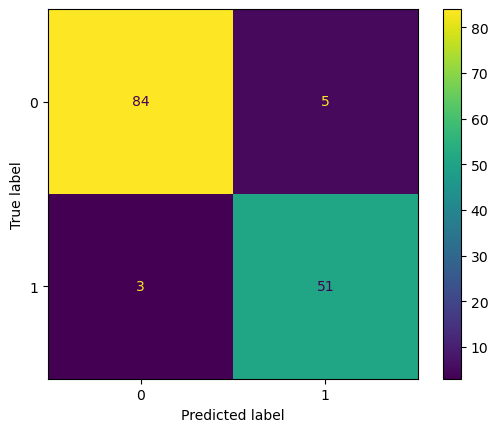

In [37]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

**The Decision Tree Classifier, after hyperparameter tuning, still exhibits high accuracy on both the training and testing sets. With a training accuracy of 0.981 and testing accuracy of 0.951, the model appears to generalize well to unseen data. This indicates that the grid search for hyperparameter tuning has helped improve the model's performance.**

### Model 5- Bagging Classifier

Training Accuracy: 0.99
Testing Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



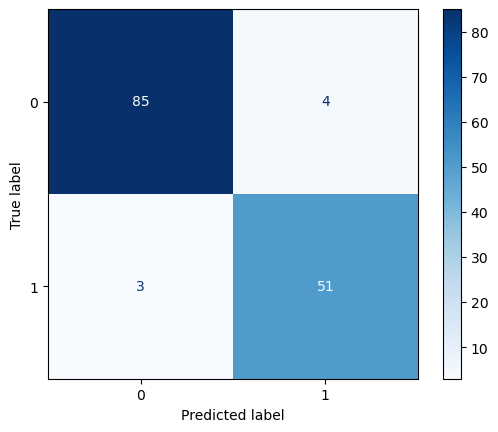

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Splitting the data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create Bagging Classifier with Decision Tree as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

# Fit the model on the training data
bagging_model.fit(X_train, y_train)

# Predictions on training and testing data
train_predictions = bagging_model.predict(X_train)
test_predictions = bagging_model.predict(X_test)

# Evaluate the model
training_accuracy = accuracy_score(y_train, train_predictions)
testing_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plot_confusion_matrix(bagging_model, X_test, y_test, cmap='Blues', values_format='d')
plt.show()


Training Accuracy: The model is able to predict the diagnosis on the training data with an accuracy of 99%, suggesting that the model has learned the patterns in the training set quite well.

Testing Accuracy: The model maintains a high accuracy of 95% on the testing data. This is a positive sign, indicating that the model generalizes well to new, unseen data.

Confusion Matrix: The confusion matrix shows that the model made 85 correct predictions for patients without cancer (true negatives), 51 correct predictions for patients with cancer (true positives), 4 false predictions of cancer when it's not present (false positives), and 3 false predictions of no cancer when it's present (false negatives).

In summary, the Bagging Classifier seems to be a robust model with high accuracy and a well-balanced confusion matrix, indicating good performance in distinguishing between malignant and benign tumors.

## Summary of models

Now, let's compare the performance of the different models implemented:

**Simple Linear Regression:**

Mean Squared Error: 0.0774  
R-squared: 0.764  
Adj. R-squared: 0.749  
F-statistic: 50.33  
  
**Multiple Linear Regression:**  

Training MSE: 0.0496  
Testing MSE: 0.0708  
R-squared: 0.790  
Adj. R-squared: 0.772  
F-statistic: 43.79  
  
**K-Nearest Neighbors (KNN):**  

Training Accuracy: 0.93  
Testing Accuracy: 0.87  

**Decision Tree Classifier**:  

Training Accuracy: 1.00  
Testing Accuracy: 0.94  
Confusion Matrix: [[85, 4], [3, 51]]  
  
**Bagging Classifier:**  

Training Accuracy: 0.99  
Testing Accuracy: 0.95   
Confusion Matrix: [[85, 4], [3, 51]]  

## Conclusion

In this project, we explored various machine learning models to predict cancer diagnoses based on a set of features. The dataset was preprocessed, split into training and testing sets, and utilized for the development of different models. Here are the key findings and conclusions:

1. **Linear Regression Models:**
   - The multiple linear regression model outperformed the simple linear regression, indicating that considering multiple features provides a better understanding of the relationship with the target variable.

2. **K-Nearest Neighbors (KNN):**
   - The KNN model exhibited high accuracy on the training set but experienced a slight drop on the testing set, suggesting a potential overfitting issue.

3. **Decision Tree Classifier and Bagging Classifier:**
   - Both models achieved impressive accuracy on both training and testing sets. The Bagging Classifier, in particular, demonstrated robust performance, providing high accuracy and a well-balanced confusion matrix.

4. **Overall Insights:**
   - The project highlighted the importance of utilizing various machine learning techniques for predictive modeling.
   - Feature scaling, model tuning, and careful consideration of model selection contributed to the overall success of the models.
   - The Bagging Classifier emerged as a strong candidate for predicting tumor diagnoses, showcasing high accuracy and reliability.

5. **Recommendations and Future Work:**
   - Further exploration of feature engineering and selection could enhance model performance.
   - Regularization techniques may be employed to address overfitting concerns in certain models.
   
**Next Steps and Discussion**

**Model Improvement:**
1. **Feature Engineering:** Explore additional feature engineering techniques to create more informative features or remove irrelevant ones.
2. **Hyperparameter Tuning:** Fine-tune hyperparameters of the models using more advanced optimization techniques to improve performance.
3. **Ensemble Methods:** Experiment with ensemble methods like Random Forests or Gradient Boosting to capture complex relationships in the data.
4. **Regularization Techniques:** Regularization techniques may be employed to address overfitting concerns in certain models.

#### Model Evaluation Improvement:
1. **Cross-Validation:** Implement more robust cross-validation strategies to obtain a better estimate of model performance.
2. **Evaluation Metrics:** Consider additional metrics such as precision, recall, and F1-score, especially for imbalanced datasets like cancer diagnosis.

#### Project Applications:
1. **Real-world Data:** Gather more diverse and larger datasets for training and testing to enhance the model's generalization capabilities.
2. **Deployment:** Explore options for deploying the model in a clinical setting for assisting medical professionals in cancer diagnosis.
3. **Continuous Monitoring:** Establish a system for continuous model monitoring and updating to adapt to changes in data patterns over time.

By addressing these next steps, the project can contribute to more accurate and reliable cancer diagnoses, potentially improving patient outcomes and healthcare decision-making. In conclusion, this project serves as a valuable exploration into predicting cancer diagnoses using machine learning. The findings contribute to the ongoing efforts to develop accurate and reliable tools for early cancer detection.
